In [152]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

In [153]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('datasets\FDUS\FDUS-5y\FDUS - open.csv', 14, True)

In [154]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.05884218215942383


In [155]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 1064 samples, validate on 56 samples
Epoch 1/1
1064/1064 [==============================] - 11s 10ms/step - loss: 0.0018 - val_loss: 0.0014


yo


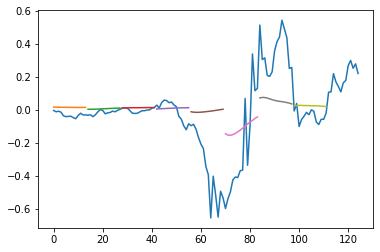

In [156]:
#Step 4 - Plot the predictions!
import numpy as np
from numpy import newaxis

def predict_sequences_multiple(model, data, window_size, prediction_len):
    # Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    prediction_seqs = []
    for i in np.arange(int(len(data) / prediction_len)):
        curr_frame = data[i * prediction_len]
        predicted = []
        for j in np.arange(int(prediction_len)):
            predicted.append(model.predict(curr_frame[newaxis, :, :])[0, 0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size - 1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs


predictions = predict_sequences_multiple(model, X_test, 14, 14)


def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    print('yo')
    # Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in np.arange(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        # plt.legend()
    plt.show()

plot_results_multiple(predictions, y_test, 14)

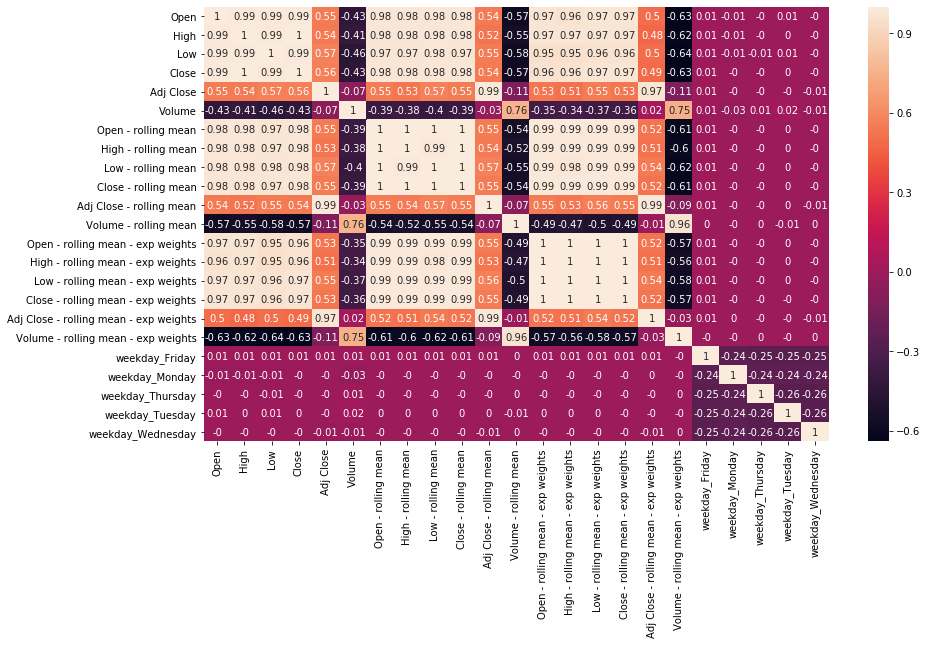

In [316]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from utils import add_weekday_as_dummies

WINDOW = 7 # window for the moving averages 

df = pd.read_csv('datasets/FDUS/FDUS-5y/FDUS.csv', index_col=0, parse_dates=True)

# standard moving average
df_rolling_mean = df.rolling(WINDOW).mean()
df_rolling_mean.columns = [str(i +' - rolling mean') for i in df_rolling_mean.columns]

# exponential moving average
df_exp_weights = df.ewm(WINDOW).mean()
df_exp_weights.columns = [str(i +' - exp weights') for i in df_rolling_mean.columns]

# concatenating all together
df = pd.concat([df,df_rolling_mean,df_exp_weights],axis=1)

# adding dummy weekdays
df['weekday'] = df.index.weekday_name # add weekday
df['weekday'].astype('category')
df = pd.get_dummies(df)

# printing correlation matrix
corrMatrix = df.corr().round(2)
sn.heatmap(corrMatrix, annot=True, xticklabels=True, yticklabels=True)
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.show()

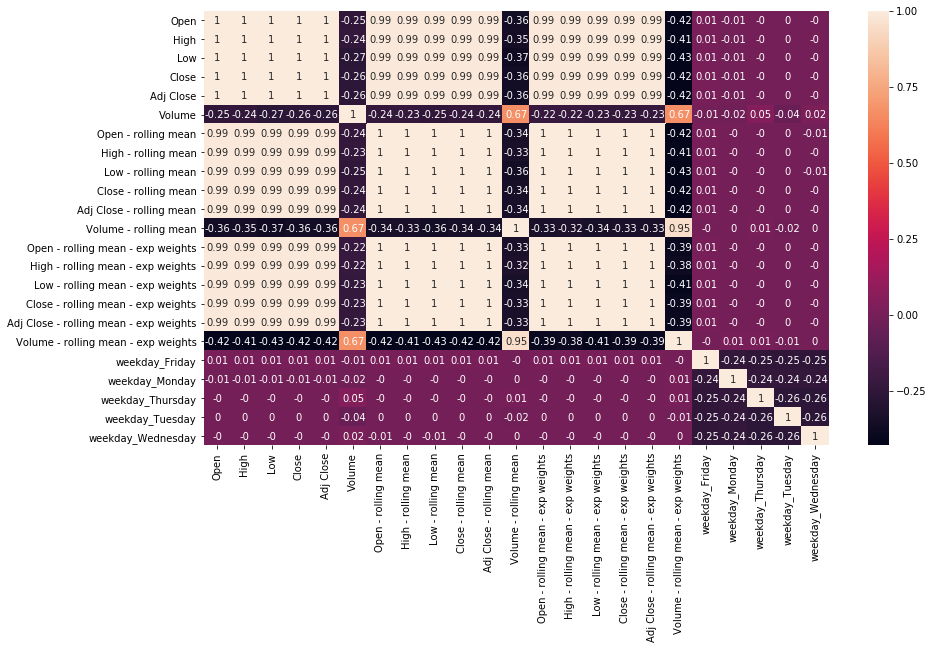

In [315]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/FB/FB - 5y.csv', index_col=0, parse_dates=True)

# standard moving average
df_rolling_mean = df.rolling(7).mean()
df_rolling_mean.columns = [str(i +' - rolling mean') for i in df_rolling_mean.columns]

# exponential moving average
df_exp_weights = df.ewm(7).mean()
df_exp_weights.columns = [str(i +' - exp weights') for i in df_rolling_mean.columns]

# concatenating all together
df = pd.concat([df,df_rolling_mean,df_exp_weights],axis=1)

# adding weekdays as dummy variables
df['weekday'] = df.index.weekday_name # add weekday
df['weekday'].astype('category')
df = pd.get_dummies(df)

# printing correlation matrix
corrMatrix = df.corr().round(2)
sn.heatmap(corrMatrix, annot=True, xticklabels=True, yticklabels=True)
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.show()